## top , WR * reco

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#from PhysicsTools.NanoAODTools.postprocessing.tools import *
#from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module
#from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection,Object
#from PhysicsTools.NanoAODTools.postprocessing.framework.postprocessor import PostProcessor
#from PhysicsTools.NanoAODTools.postprocessing.analyser.ID.GenStatus import *
#from PhysicsTools.NanoAODTools.postprocessing.analyser.AnalyserHelper.AnalyserHelper import *
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



## x 방향이 이벤트 y 방향이 각 입자의 정보 z 방향이 입자들 각각이라 생각하면 될듯?
# 각 층(이벤트)에 입자들이 쭉 있고 거기에 정보가 있다고 생각하면 될듯?

## 일단 보고 싶은 키워드나 주제를 고르면 그게 이벤트 별로 있으면 다 뽑아옴 . 이제 거기서 필터로 걸러내면 모든 이벤트는 해당이 안되고 특정 이벤트만 남으면 거기 안에 들어있는 값 쓰면 됨

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()


pdgid = events["GenPart_pdgId"].array()
mass = events["GenPart_mass"].array()
pt = events["GenPart_pt"].array()
phi = events["GenPart_phi"].array()
eta = events["GenPart_eta"].array()



wmask =(((pdgid == 24) | (pdgid == -24)) & (mass < 100))
bmask = ((pdgid == 5) | (pdgid == -5) )
wmass = mass[wmask]
bmass = mass[bmask]
wpt = pt[wmask]
bpt = pt[bmask]
wphi = phi[wmask]
bphi = phi[bmask]
weta = eta[wmask]
beta = eta[bmask]
# 두 개 이상의 b quark, 하나이상의 W onshell boson만 있는 이벤트만 필터링
valid_events = (ak.num(bpt) >= 2) & (ak.num(wpt) >= 1)

# apply mask
bpt = bpt[valid_events]
bphi = bphi[valid_events]
beta = beta[valid_events]
bmass = bmass[valid_events]
wpt = wpt[valid_events]
wphi = wphi[valid_events]
weta = weta[valid_events]
wmass = wmass[valid_events]


# 벡터 구성
b1 = vector.array({
    "pt": bpt[:, 0],
    "phi": bphi[:, 0],
    "eta": beta[:, 0],
    "mass": bmass[:, 0]
})

b2 = vector.array({
    "pt": bpt[:, 1],
    "phi": bphi[:, 1],
    "eta": beta[:, 1],
    "mass": bmass[:, 1]
})

w1 = vector.array({
    "pt": wpt[:, 0],
    "phi": wphi[:, 0],
    "eta": weta[:, 0],
    "mass": wmass[:, 0]
})

top =  b2 + w1
#print("Top mass (reco from gen parts):", (top.mass), "GeV")
# 히스토그램 그리기
plt.hist(top.mass, bins=100, range=(160, 200), alpha=1.0, label='Top Mass')
wvirtual = b1 + b2 + w1
plt.hist(wvirtual.mass, bins=200, range=(0, 8000), alpha=0.7, label='W Virtual Mass')

#top 갯수
print("Number of top quarks:", len(top.mass))
# wvirtual 갯수
print("Number of W virtual particles:", len(wvirtual.mass))




## Gen jet delta r

1840


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  4.,  4.,  5.,
         6.,  7.,  6.,  4., 11., 12.,  9., 14., 15., 14.,  8., 11., 21.,
        15., 19., 31., 61., 43., 66., 31., 24.,  9., 11.,  5., 10.,  4.,
         3.,  3.,  1.,  3.,  3.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ,  0.60000002,  0.69999999,  0.80000001,  0.89999998,
         1.        ,  1.10000002,  1.20000005,  1.29999995,  1.39999998,
         1.5       ,  1.60000002,  1.70000005,  1.79999995,  1.89999998,
         2.        ,  2.0999999 ,  2.20000005,  2.29999995,  2.4000001 ,
         2.5       ,  2.5999999 ,  2.70000005,  2.79999995,  2.900000

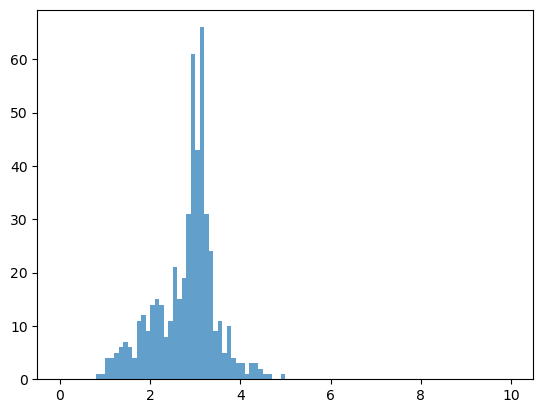

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()

ak8jetmass = events["GenJetAK8_mass"].array()
ak8flavor = events["GenJetAK8_partonFlavour"].array()
ak8eta = events["GenJetAK8_eta"].array()
ak8phi = events["GenJetAK8_phi"].array()
bmask = (ak8flavor == 5) 
notbmask = (ak8flavor != 5)

ak8jetmass_b = ak8jetmass[bmask]
ak8jetmass_notb = ak8jetmass[notbmask]
import matplotlib.pyplot as plt

# 1차원 배열로 flatten (awkward → numpy 변환)
aa = ak.to_numpy(ak.flatten(ak8jetmass_b))
nb = ak.to_numpy(ak.flatten(ak8jetmass_notb))
'''
plt.hist(aa, bins=100, range=(0, 500), alpha=0.9, label="b-quark jets")
plt.hist(nb, bins=100, range=(0, 500), alpha=0.5, label="non-b jets")
plt.xlabel("Jet Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.show()
'''
# 조건: GenJetAK8가 2개 이상인 이벤트만
valid = ak.num(ak8jetmass) >= 2
ak8mass = ak8jetmass[valid]
eta = ak8eta[valid]
phi = ak8phi[valid]

# 내림차순 정렬된 인덱스
sorted_idx = ak.argsort(ak8mass, axis=1, ascending=False)

# 인덱스로 정렬된 jet들 얻기
sorted_eta = eta[sorted_idx]
sorted_phi = phi[sorted_idx]

# 가장 큰 두 jet의 eta, phi
eta1 = ak.firsts(sorted_eta)          # leading
eta2 = ak.firsts(ak.drop_none(sorted_eta[:, 1:]))  # subleading

phi1 = ak.firsts(sorted_phi)
phi2 = ak.firsts(ak.drop_none(sorted_phi[:, 1:]))

# ΔR 계산
delta_eta = eta1 - eta2
delta_phi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
delta_r = np.sqrt(delta_eta**2 + delta_phi**2)

plt.hist(delta_r, bins=100, range=(0, 10), alpha=0.7, label='ΔR between leading jets')


## gen top 골랐을때 둘 중에서 첫번째꺼 사용

## Finding fake ak8 near top

[1.6306744  2.9097733  1.5955853  1.8727498  0.9430994  2.7054276
 1.7090809  1.431173   1.949297   2.131617   3.0076637  2.2893496
 2.038956   2.7068696  1.6295403  2.4668908  3.1306994  2.0989084
 2.9551637  4.698737   1.0182695  3.1194506  1.3011861  2.3916702
 1.3749205  1.899133   1.3497208  2.8392735  1.7098949  1.8410482
 1.9102705  1.986036   1.6757579  2.4297442  2.4258652  1.9625273
 3.3392136  3.0437467  1.5079886  0.8077067  0.8870139  0.9942843
 1.7153565  3.2163572  1.8013672  1.1520325  1.513495   1.584767
 1.4025834  2.623253   2.5033965  1.8522551  2.0307531  4.196431
 1.1023431  1.1830486  3.3763337  1.9893683  2.6681075  2.830835
 2.374306   1.1531507  1.5747147  1.5602564  2.6249154  1.7420878
 2.264198   1.263086   2.7996352  2.7759833  0.6625106  2.1873746
 1.7157849  2.2128794  1.4700117  1.6642625  2.9295964  1.3486397
 1.7989258  2.711706   2.874613   1.7716907  2.8312347  1.6554646
 1.8426702  1.8752825  1.7205304  1.4606538  2.4046123  2.3160474
 2.6040182  1

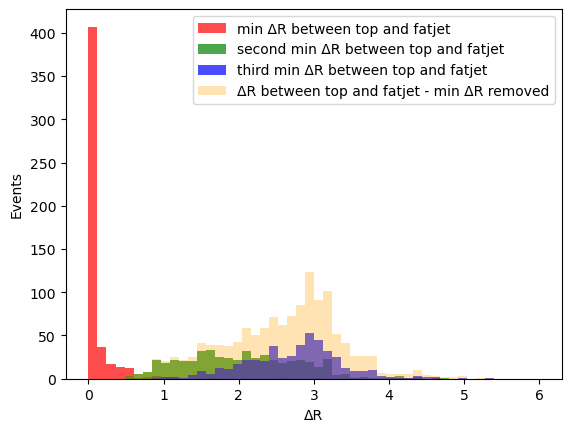

In [70]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()



#deltar
dr_total = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    # fatjet
    top_etas = top_eta[i][0]
    
    top_phi = top_phi1[i][0]
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)

    dr = np.sort(dr)  # Sort the ΔR 
    dr_total.append(dr)



# leading ΔR 값만 모아서 1-D 배열로
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total]) #세번째로 작은 ΔR 값
print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)
plt.hist(leading_drs, bins=50, range=(0, 6), alpha=0.7, label='min ΔR between top and fatjet',color = 'red')
plt.hist(nextleading_drs, bins=50, range=(0, 6), alpha=0.7, label='second min ΔR between top and fatjet',color = 'green')
plt.hist(third_drs, bins=50, range=(0, 6), alpha=0.7, label='third min ΔR between top and fatjet',color = 'blue')
plt.hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR between top and fatjet - min ΔR removed', color = 'orange')
plt.xlabel('ΔR')
plt.ylabel('Events')
plt.legend()
##############################
#####################################






[[5, 5, 0, 0, 0], [5, 5, 0], [5, 5, 0], ..., [0, 5, 5, 5, 0], [5, 5, 0, 0]]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


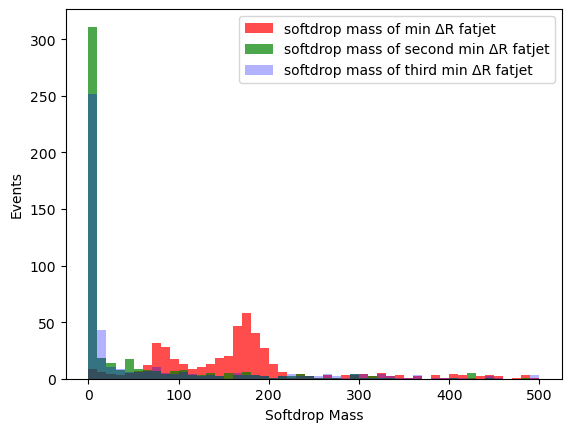

In [71]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()


#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []

for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    # fatjet
    top_etas = top_eta[i][0]
    top_phi = top_phi1[i][0]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)

    dr_total.append(dr)

plt.hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
plt.hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
plt.hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.3, label='softdrop mass of third min ΔR fatjet', color='blue')
plt.xlabel('Softdrop Mass')
plt.ylabel('Events')
plt.legend()
#plt.yscale('log')


hadron_flavour = events["FatJet_hadronFlavour"].array()
print(hadron_flavour)
tmask = ((hadron_flavour == 6))
hadron_flavour = hadron_flavour[tmask]
print(hadron_flavour)




In [38]:
print(len(nextleading_drs))
nextleading_drs = nextleading_drs[nextleading_drs<1]
print(len(nextleading_drs))
print(nextleading_drs)

500
44
[0.9430994  0.8077067  0.8870139  0.9942843  0.6625106  0.9385562
 0.72134894 0.98302215 0.8612945  0.88537693 0.58158576 0.7621458
 0.953944   0.9464529  0.8144732  0.9734624  0.6826864  0.91640896
 0.5189752  0.9297866  0.97794396 0.85838723 0.6259995  0.584061
 0.66768634 0.8512647  0.8558706  0.90830475 0.62345785 0.9058289
 0.8067178  0.99839664 0.8618558  0.90699995 0.9147833  0.9215305
 0.90791976 0.8525879  0.7911976  0.9393499  0.8488527  0.7424921
 0.9845503  0.82251376]


# gen top 골랐을때 둘 중에서 두번째꺼 사용

## softdrop mass & top tagger with next near dr jet

[1.383376   1.9767562  0.8744959  0.992814   1.2546514  1.8353679
 2.3684328  1.7328889  1.9871843  1.0042918  2.6689835  2.94923
 1.2585255  1.0759736  3.1080694  3.886913   1.4444261  1.5970509
 1.1486126  1.5090355  1.1928885  2.0998547  0.88124776 2.410912
 1.7235053  2.0953422  3.0765004  1.0462505  1.1804335  1.2731054
 1.1712931  1.8938663  2.7300289  1.9034444  3.4053354  2.6791098
 3.7941253  1.3215046  1.7419728  2.0769522  1.8332691  0.9559111
 2.1296098  1.0974574  1.7752595  1.6194098  2.6914096  2.8537595
 1.063034   1.650687   1.5375917  1.7937651  1.0024478  1.9423801
 1.4577544  3.3650126  2.1729007  1.8993672  2.4261963  2.4096122
 2.1092896  3.1300433  0.89182943 3.000137   1.6659678  2.1427114
 2.42725    1.5203127  2.8557115  2.674428   1.6501243  3.2076268
 1.690399   2.5007064  1.9476     0.8518693  3.0941803  2.1177502
 1.4445502  1.4315656  0.93399894 3.5706193  0.97200084 1.66902
 1.38216    1.6849306  1.8046695  2.841393   1.5740912  2.887696
 2.4129233  1.66

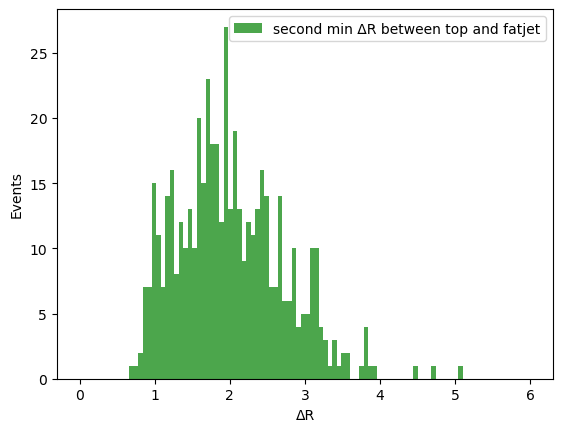

In [16]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_22.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

#deltar
dr_total = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    
    top_phi = top_phi1[i][1]
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)

    dr = np.sort(dr)  # Sort the ΔR 
    dr_total.append(dr)



# leading ΔR 값만 모아서 1-D 배열로
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total]) #세번째로 작은 ΔR 값
print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)
#plt.hist(leading_drs, bins=50, range=(0, 6), alpha=0.7, label='min ΔR between top and fatjet',color = 'red')
plt.hist(nextleading_drs, bins=100, range=(0, 6), alpha=0.7, label='second min ΔR between top and fatjet',color = 'green')
#plt.hist(third_drs, bins=50, range=(0, 6), alpha=0.7, label='third min ΔR between top and fatjet',color = 'blue')
#plt.hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR between top and fatjet - min ΔR removed', color = 'orange')
plt.xlabel('ΔR')
plt.ylabel('Events')
plt.legend()
##############################
#####################################







[[5, 5, 0, 0, 0], [5, 5, 0], [5, 5, 0], ..., [0, 5, 5, 5, 0], [5, 5, 0, 0]]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


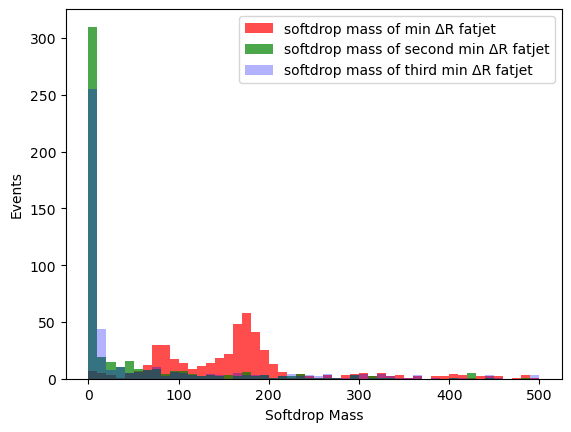

In [68]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()


#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []

for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)

    dr_total.append(dr)

plt.hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
plt.hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
plt.hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.3, label='softdrop mass of third min ΔR fatjet', color='blue')
plt.xlabel('Softdrop Mass')
plt.ylabel('Events')
plt.legend()
#plt.yscale('log')


hadron_flavour = events["FatJet_hadronFlavour"].array()
print(hadron_flavour)
tmask = ((hadron_flavour == 6))
hadron_flavour = hadron_flavour[tmask]
print(hadron_flavour)




# gen top 골랐을때 둘 중에서  첫번째거 두번째거 ( before FSR , after FSR)차이 비교 

[np.float32(0.0), np.float32(0.001953125), np.float32(0.009765625), np.float32(0.001953125), np.float32(0.0), np.float32(0.009765625), np.float32(0.009765625), np.float32(0.013671875), np.float32(0.03515625), np.float32(0.17578125), np.float32(0.0004272461), np.float32(0.0), np.float32(0.030639648), np.float32(0.030761719), np.float32(0.009765625), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.001953125), np.float32(0.027862549), np.float32(0.0234375), np.float32(0.607605), np.float32(0.0), np.float32(0.00018310547), np.float32(0.0), np.float32(0.0625), np.float32(0.00048828125), np.float32(0.08203125), np.float32(0.11425781), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.013671875), np.float32(0.016601562), np.float32(0.09765625), np.float32(0.0063476562), np.float32(0.20703125), np.float32(0.045898438), np.float32(0.084472656), np.float32(0.00048828125), np.float32

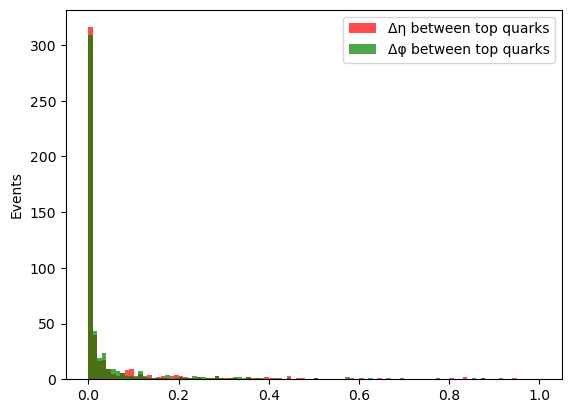

In [106]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
gen_status = events["GenPart_statusFlags"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()


delta_etas = []
delta_phis = []
for i in range(len(fatjet_pt)):
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    top_etas0 = top_eta[i][0]
    top_phi0 = top_phi1[i][0]
    top_etas1 = top_eta[i][1]
    top_phis1 = top_phi1[i][1]
    
    delta_eta = abs(top_etas0 - top_etas1 )
    delta_phi = abs(top_phi0 - top_phis1)

    delta_etas.append(delta_eta)
    delta_phis.append(delta_phi)

print(delta_etas)
print(delta_phis)
plt.hist(delta_etas, bins=100, range=(0, 1), alpha=0.7, label='Δη between top quarks', color='red')
plt.hist(delta_phis, bins=100, range=(0, 1), alpha=0.7, label='Δφ between top quarks', color='green')
plt.ylabel('Events')
plt.legend()

for pid in gen_pdgid[2]:
    print(pid)



# --- flag 이름 테이블 (NanoAOD GenPart_statusFlags 순서) ---
flag_names = [
    "isPrompt",                          # bit 0
    "isDecayedLeptonHadron",             # 1
    "isTauDecayProduct",                 # 2
    "isPromptTauDecayProduct",           # 3
    "isDirectTauDecayProduct",           # 4
    "isDirectPromptTauDecayProduct",     # 5
    "isDirectHadronDecayProduct",        # 6
    "isHardProcess",                     # 7
    "fromHardProcess",                   # 8
    "isHardProcessTauDecayProduct",      # 9
    "isDirectHardProcessTauDecayProduct",# 10
    "fromHardProcessBeforeFSR",          # 11
    "isFirstCopy",                       # 12
    "isLastCopy",                        # 13
    "isLastCopyBeforeFSR"                # 14
]

def decode(flags):
    """return list of flag names that are set in `flags`"""
    return [name for i, name in enumerate(flag_names) if flags & (1 << i)]

print("4481  →", decode(4481))
print("10497 →", decode(10497))


print(gen_status[2][16])
print(gen_status[2][18])
print(gen_pdgid[2][16])


##  가까운것들 top tagger 점수

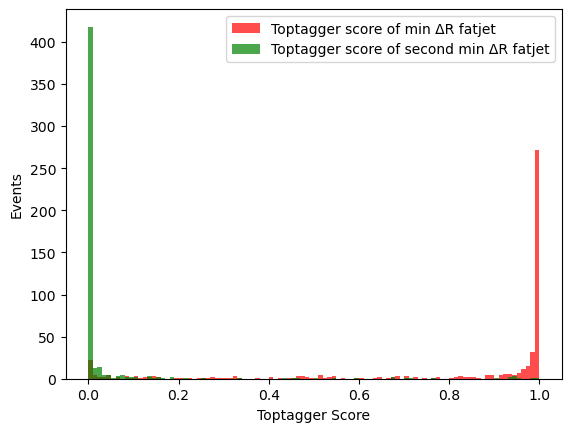

In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

#toptagger 
toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()

#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []
min_tagger_score = []
second_min_tagger_score = []
third_min_tagger_score = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)
        tagger1 = toptagger[i][idx]
        min_tagger_score.append(tagger1)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
        tagger2 = toptagger[i][idx1]
        second_min_tagger_score.append(tagger2)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)
        tagger3 = toptagger[i][idx2]
        third_min_tagger_score.append(tagger3)

    dr_total.append(dr)

plt.hist(min_tagger_score, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of min ΔR fatjet', color='red')
plt.hist(second_min_tagger_score, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second min ΔR fatjet', color='green')
#plt.hist(third_min_tagger_score, bins=50, range=(0, 1), alpha=0.3, label='Toptagger score of third min ΔR fatjet', color='blue')
plt.xlabel('Toptagger Score')
plt.ylabel('Events')
plt.legend()


## for all file

In [13]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)

dr_total_all = []

min_idx_all = []
second_min_idx_all = []
third_min_idx_all = []

min_drpmass_all = []
second_min_drpmass_all = []
third_min_drpmass_all = []

min_tagger_score_all = []
second_min_tagger_score_all = []
third_min_tagger_score_all = []

# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]




    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()

    # softdrop mass
    fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

    # toptagger
    toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()


    #deltar
    dr_total = []

    min_idx = []
    second_min_idx = []
    third_min_idx = []
    min_drpmass = []
    second_min_drpmass = []
    third_min_drpmass = []
    
    min_tagger_score = []
    second_min_tagger_score = []
    third_min_tagger_score = []
    for i in range(len(fatjet_pt)):
        if len(fatjet_pt[i]) == 0:
            continue
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][1]
        top_phi = top_phi1[i][1]
    
        delta_eta = fatjet_eta[i] - top_etas
    
        delta_phi = fatjet_phi[i] -top_phi 
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr) >1:
            # dr 길이가 1보다 크면 가장 작은 ΔR 값의 인덱스 저장
            idx = np.argsort(dr)[0]
            min_idx.append(idx)
            drpmass = fatjet_softdrop_mass[i][idx]
            min_drpmass.append(drpmass)
            tagger1 = toptagger[i][idx]
            min_tagger_score.append(tagger1)
            # 두번째로 작은 ΔR 값의 인덱스 저장
            idx1 = np.argsort(dr)[1]
            second_min_idx.append(idx1)
            drpmass = fatjet_softdrop_mass[i][idx1]
            second_min_drpmass.append(drpmass)
            tagger2 = toptagger[i][idx1]
            second_min_tagger_score.append(tagger2)
        if len(dr) > 2:
            idx2 = np.argsort(dr)[2]
            third_min_idx.append(idx2)
            drpmass = fatjet_softdrop_mass[i][idx2]
            third_min_drpmass.append(drpmass)
            tagger3 = toptagger[i][idx2]
            third_min_tagger_score.append(tagger3)
        dr = np.sort(dr)  # Sort the ΔR
        dr_total.append(dr)
    
    # 누적 리스트에 추가
    dr_total_all.extend(dr_total)
    min_idx_all.extend(min_idx)
    second_min_idx_all.extend(second_min_idx)
    third_min_idx_all.extend(third_min_idx)
    
    min_drpmass_all.extend(min_drpmass)
    second_min_drpmass_all.extend(second_min_drpmass)
    third_min_drpmass_all.extend(third_min_drpmass)

    min_tagger_score_all.extend(min_tagger_score)
    second_min_tagger_score_all.extend(second_min_tagger_score)
    third_min_tagger_score_all.extend(third_min_tagger_score)
#----plot



Processing ROOT files: 100%|██████████| 114/114 [10:33<00:00,  5.56s/it]


In [9]:
print(dr_total_all[0])

[3.03, 0.00799, 1.9, 1.63, 2.72]


56759


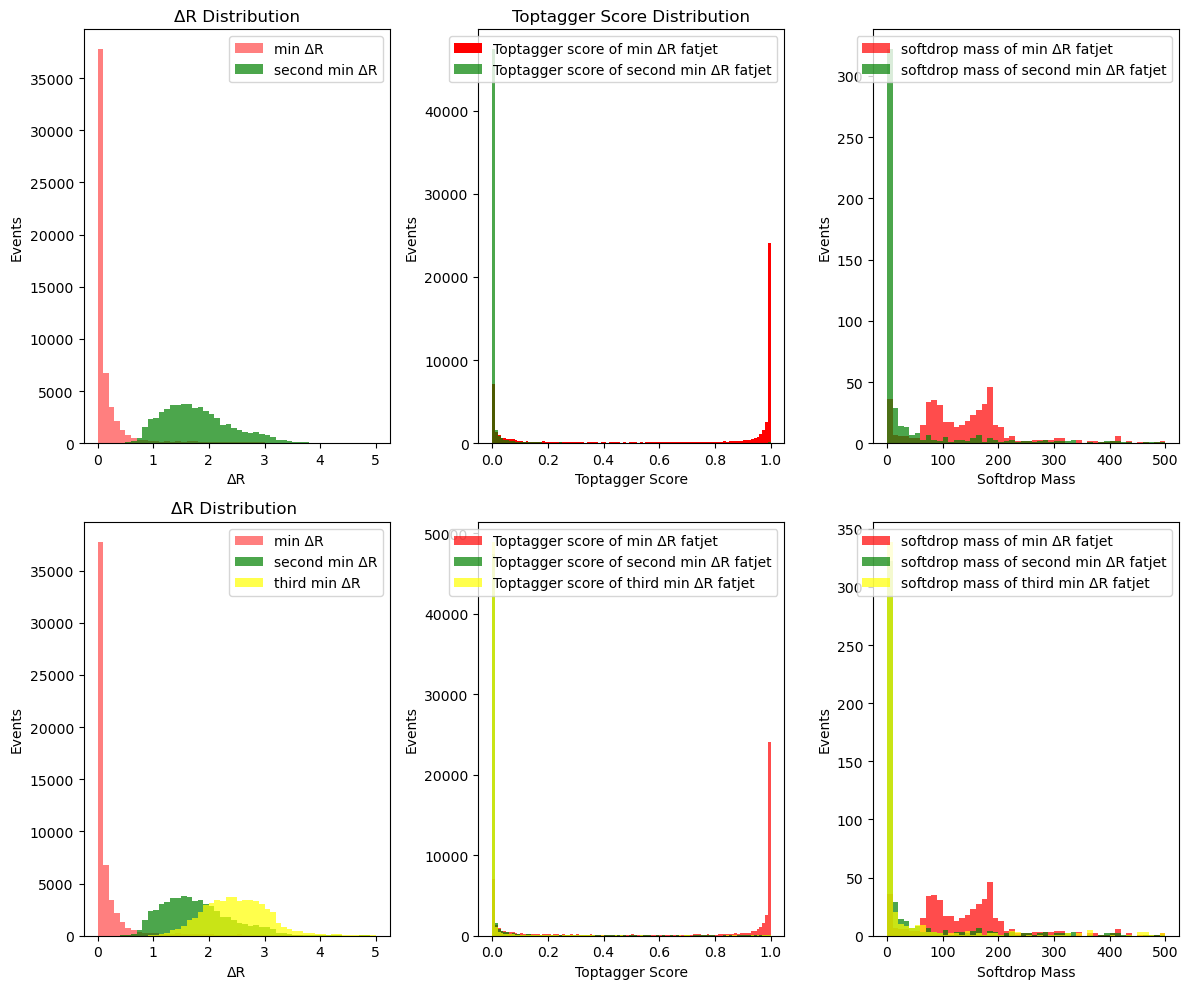

In [14]:
# leading ΔR 값만 모아서 1-D 배열로
print(len(dr_total_all))
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total_all]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total_all]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total_all]) #세번째로 작은 ΔR 값
#print(leading_drs)
#print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total_all]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)

# ΔR 분포 subplot 추가
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs[0, 0].hist(leading_drs, bins=50, range=(0, 5), alpha=0.5, label='min ΔR', color='red')
axs[0, 0].hist(nextleading_drs, bins=50, range=(0, 5), alpha=0.7, label='second min ΔR', color='green')
axs[1, 0].hist(leading_drs, bins=50, range=(0, 5), alpha=0.5, label='min ΔR', color='red')
axs[1, 0].hist(nextleading_drs, bins=50, range=(0, 5), alpha=0.7, label='second min ΔR', color='green')
axs[1, 0].hist(third_drs, bins=50, range=(0, 5), alpha=0.7, label='third min ΔR', color='yellow')
#axs[0, 1].hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR (min removed)', color='orange')
axs[0, 0].set_xlabel('ΔR')
axs[0, 0].set_ylabel('Events')
axs[0, 0].legend()
axs[0, 0].set_title('ΔR Distribution')

axs[1, 0].set_xlabel('ΔR')
axs[1, 0].set_ylabel('Events')
axs[1, 0].legend()
axs[1, 0].set_title('ΔR Distribution ')

axs[0, 1].hist(min_tagger_score_all, bins=100, range=(0, 1), alpha=1.0, label='Toptagger score of min ΔR fatjet', color='red')
axs[0, 1].hist(second_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second min ΔR fatjet', color='green')
axs[1, 1].hist(min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of min ΔR fatjet', color='red')
axs[1, 1].hist(second_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second min ΔR fatjet', color='green')
axs[1, 1].hist(third_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of third min ΔR fatjet', color='yellow')
axs[0, 1].set_xlabel('Toptagger Score')
axs[0, 1].set_ylabel('Events')
axs[0, 1].legend()
axs[0, 1].set_title('Toptagger Score Distribution')

axs[1, 1].set_xlabel('Toptagger Score')
axs[1, 1].set_ylabel('Events')
axs[1, 1].legend()


# min, second min, third min softdrop mass subplot (axs[0,1])
axs[0, 2].hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
axs[0, 2].hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
axs[0, 2].set_xlabel('Softdrop Mass')
axs[0, 2].set_ylabel('Events')
axs[0, 2].legend()
axs[1, 2].hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
axs[1, 2].hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
axs[1, 2].hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of third min ΔR fatjet', color='yellow')
axs[1, 2].set_xlabel('Softdrop Mass')
axs[1, 2].set_ylabel('Events')
axs[1, 2].legend()

plt.tight_layout()
plt.show()


## Small delta r , 